In [1]:
from utils.common_imports import *
from config import DATA_DIR
from utils_final_figures import (plot_infidelities, plot_boxplot_ratios,
                                 plot_gfactor_vs_occupation, load_LSES_data, plot_raw_data,
                                 plot_locality_boxplots, plot_locality_array)


In [2]:
import utils.analysis_tools as tools
from gfactor_tunability.utils_statistics_gfactor_tunability import plot_LSES_individual
from drive_efficiency.utils_statistics_driving_slope import plot_rabi_efficiency_individual, load_driving_slope_data

In [3]:
from pathlib import Path
from config import DATA_DIR

try:
    script_dir = Path(__file__).resolve().parent
except NameError:
    script_dir = Path().resolve()

# Figure 1

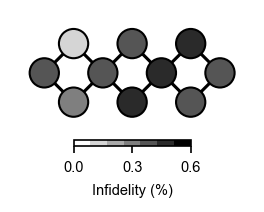

In [4]:
plot_infidelities(save_path=script_dir/'figure1'/'subfigures')

# Figure 2

## Figure 2a

Max value of z: 0.4475
Min value of z: 0.14375


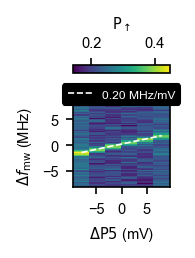

In [5]:
qubit = 'Q5'
num_holes = '1h'
gate = 'P5'

plot_raw_data(qubit, num_holes, gate, properties=['LSES'], save_path=script_dir/'figure2'/'subfigures')

Max value of z: 0.94875
Min value of z: 0.32


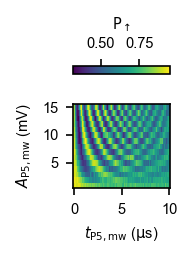

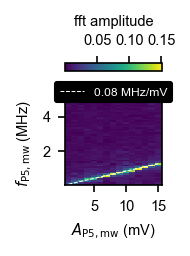

In [6]:
plot_raw_data(qubit, num_holes, gate, properties=['drive_efficiency'], save_path=script_dir/'figure2'/'subfigures')

## Figure 2b

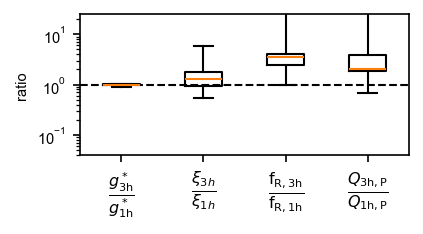

[0.9722417457636053, 1.7241686636096059, 20.61634592449805, 11.723406626837335]
[0.9740875966496346, 1.2780847758645009, 3.5662921073520946, 2.0491003878906002]


In [7]:
averages, medians = plot_boxplot_ratios(save_path=script_dir/'figure2'/'subfigures')
print(averages)
print(medians)

## Figure 2c

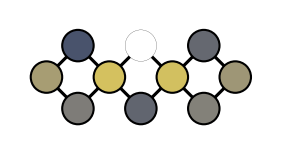

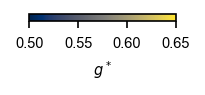

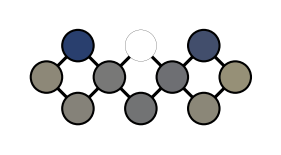

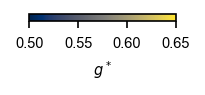

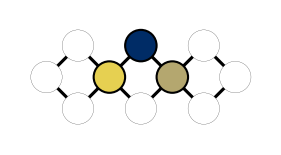

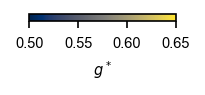

In [8]:
plot_gfactor_vs_occupation(save_path=script_dir/'figure2'/'subfigures', hole_occupation=['1h', '3h', '5h'], title=False)

## Figure 2d

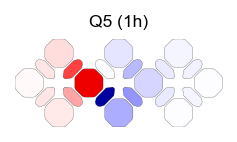

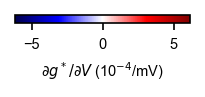

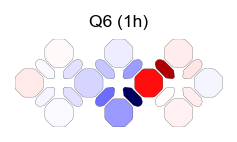

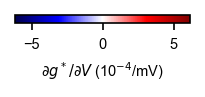

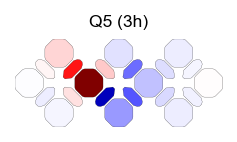

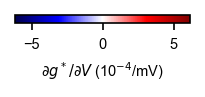

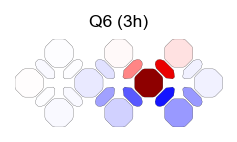

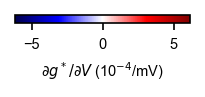

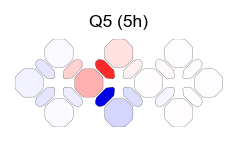

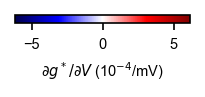

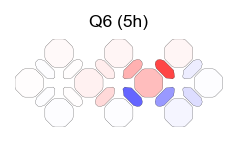

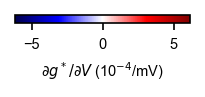

In [9]:
df_gfactor, unit = load_LSES_data()
qubits_to_plot = ['Q5', 'Q6']
num_holes_to_plot = ['1h', '3h', '5h']

vmax = max(df_gfactor[num_holes].abs().max().max() for num_holes in ['1h', '3h', '5h'])
quantity = r'$\partial{g^*}/\partial{V}$'
cbar_label = rf'{quantity} ({unit})'
for num_holes in num_holes_to_plot:
    for qubit in qubits_to_plot:
        plot_LSES_individual(qubit, num_holes, df_gfactor, vmax=vmax,
                             save=True, show_plot=True,
                             unit=cbar_label,
                             dark_background=False,
                             transparent_png=True,
                             plot_with_cbar=False,
                             figsize=tools.cm2inch(two_column_width_cm/4 *0.9, 3),
                             save_path=script_dir/'figure2'/'subfigures')


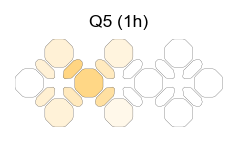

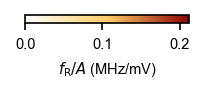

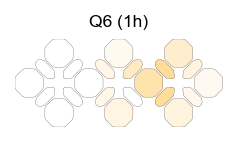

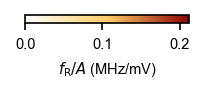

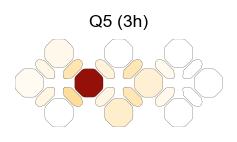

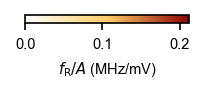

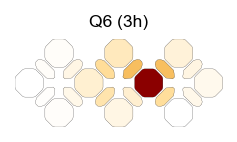

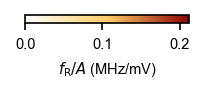

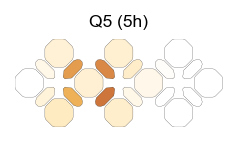

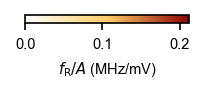

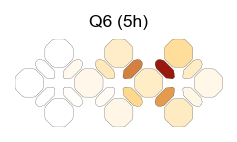

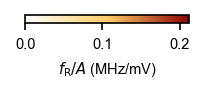

In [10]:
df = load_driving_slope_data(DATA_DIR)
qubits_to_plot = ['Q5', 'Q6']
num_holes_to_plot = ['1h', '3h', '5h']

vmax = max(df[num_holes].abs().max().max() for num_holes in ['1h', '3h', '5h'])
for num_holes in num_holes_to_plot:
    for qubit in qubits_to_plot:
            plot_rabi_efficiency_individual(qubit, num_holes, df,
                                            vmax=vmax,
                                            save=True,
                                            dark_background=False,
                                            dark_color='black',
                                            transparent_png=True,
                                            figsize=tools.cm2inch(two_column_width_cm/4 *0.9, 3),
                                            plot_with_cbar=False,
                                            save_path=script_dir/'figure2'/'subfigures')

# Figure 4

## Figure 4a-d

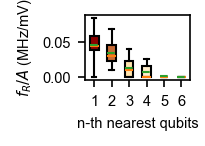

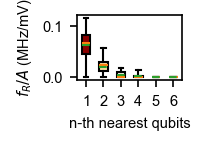

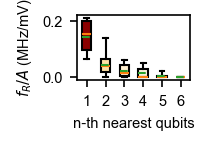

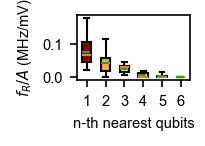

In [11]:
plot_locality_boxplots(num_holes=['1h', '3h'], gate_types=['plunger', 'barrier'], title=False, save_path=script_dir/'figure4'/'subfigures')

## Figure 3e-h

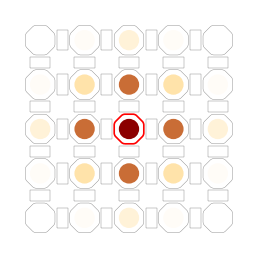

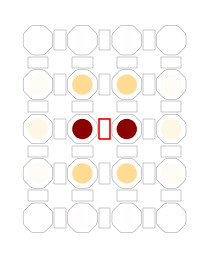

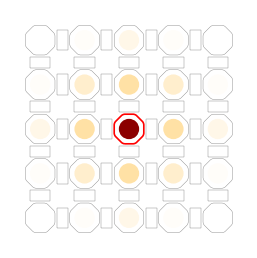

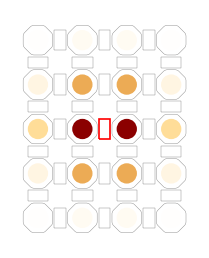

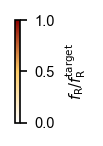

In [12]:
plot_locality_array(num_holes=['1h', '3h'], gate_types=['plunger', 'barrier'], title=False, save_path=script_dir/'figure4'/'subfigures')